In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from random import randint

In [2]:
from random import randint

class RandomCropDataset():
    def __init__(self, patch_shape, x='x', y='y', data_key='Rad'):
        self.patch_shape = patch_shape
        self.x = x
        self.y = y
        self.data_key = data_key
    def __call__(self, ds):
        assert ds[self.x].shape[0] >= self.patch_shape[0], 'Invalid dataset shape: %s' % str(dataset[self.x].shape)
        assert ds[self.y].shape[0] >= self.patch_shape[1], 'Invalid dataset shape: %s' % str(dataset[self.y].shape)
        xmin = randint(0, ds[self.x].shape[0] - self.patch_shape[0])
        ymin = randint(0, ds[self.y].shape[0] - self.patch_shape[1])
        patch_ds = ds.sel({self.x: slice(ds[self.x][xmin], ds[self.x][xmin + self.patch_shape[0] - 1]), # 0-based index
                             self.y: slice(ds[self.y][ymin], ds[self.y][ymin + self.patch_shape[1] - 1])}) # 0-based index
        # assert patch_ds[self.data_key].std() != 0, 'Invalid patch found (all values %f)' % patch_ds[self.data_key].mean()
        return patch_ds

In [39]:
test_file = '/mnt/disks/msg-data/msg/20200120005743_msg.nc'
ds = xr.open_dataset(test_file)

In [40]:
ds.band_wavelength

<xarray.DataArray 'band_wavelength' (band_wavelength: 11)> Size: 88B
array([ 1.64,  3.92,  8.7 ,  9.66, 10.8 , 12.  , 13.4 ,  0.64,  0.81,  6.25,
        7.35])
Coordinates:
  * band_wavelength  (band_wavelength) float64 88B 1.64 3.92 8.7 ... 6.25 7.35

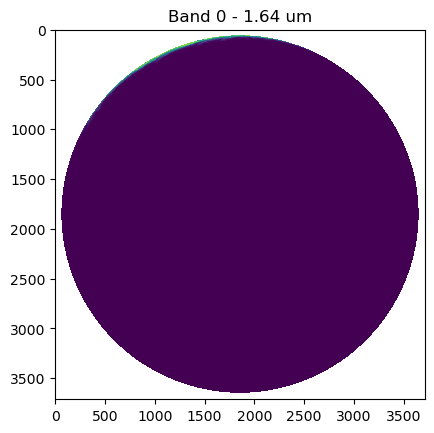

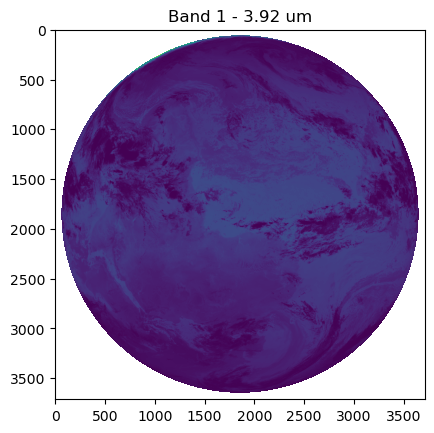

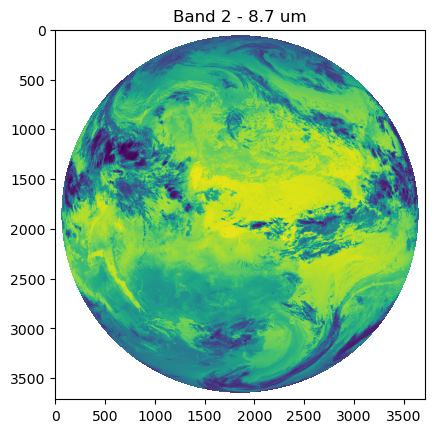

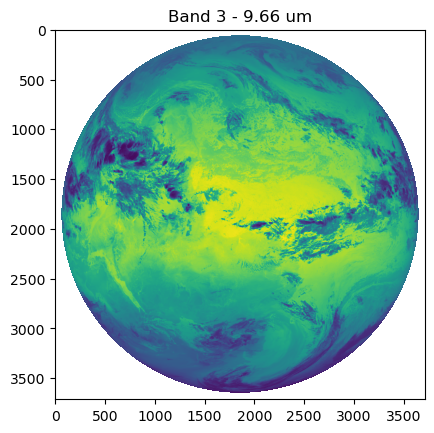

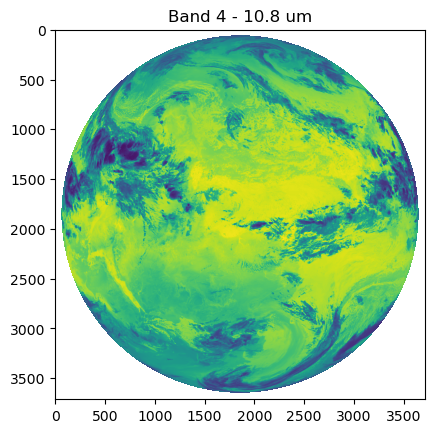

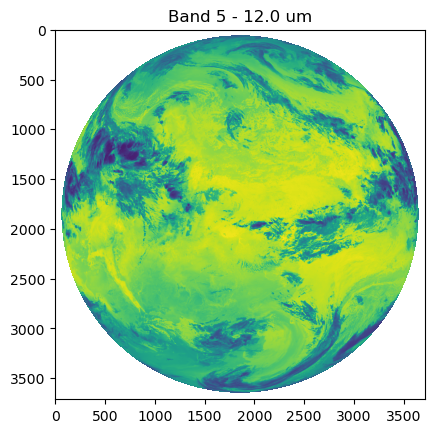

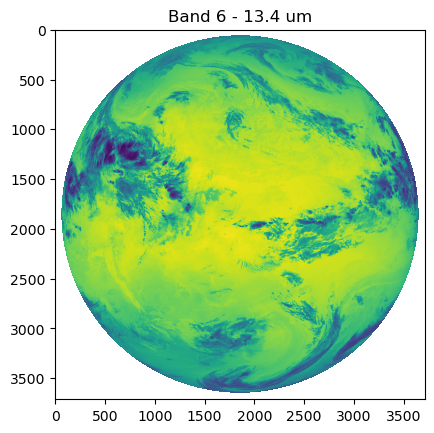

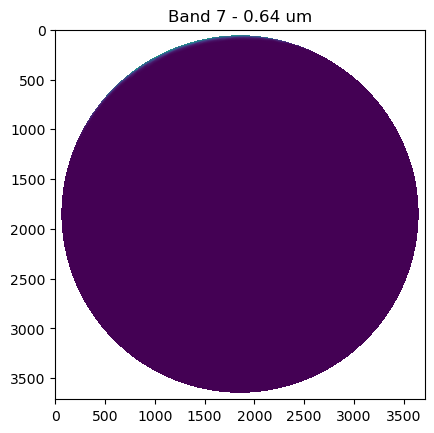

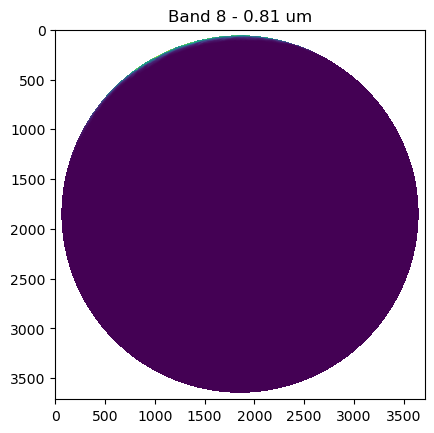

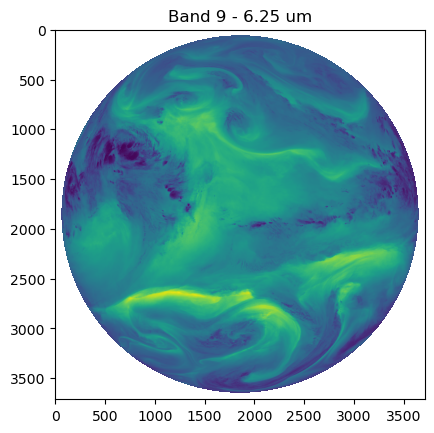

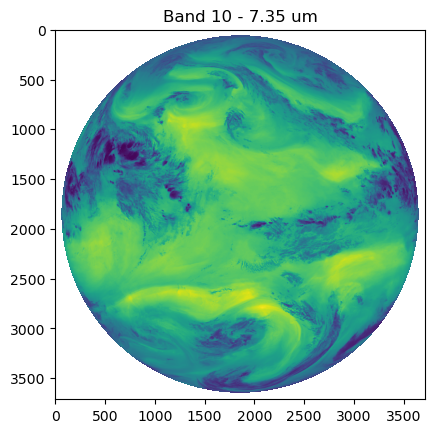

In [41]:
for i in range(ds.Rad.shape[0]):
    plt.figure()
    plt.imshow(ds.Rad.values[i])
    plt.title(f'Band {i} - {np.round(float(ds.band_wavelength.values[i]), 2)} um')
    plt.savefig(f'band_{i}.png')

In [23]:
crop = RandomCropDataset((256, 256))

In [36]:
patch = crop(ds)
assert patch['Rad'].shape == (16, 256, 256), 'Invalid patch shape: %s' % str(patch['Rad'].shape)

In [25]:
def _check_constant_channels(data: np.array) -> bool:
    """
    Check if any channel in the data is constant.
    """
    return np.any(np.nanstd(data, axis=(1, 2)) == 0)

In [37]:
_check_constant_channels(patch['Rad'].values)

False

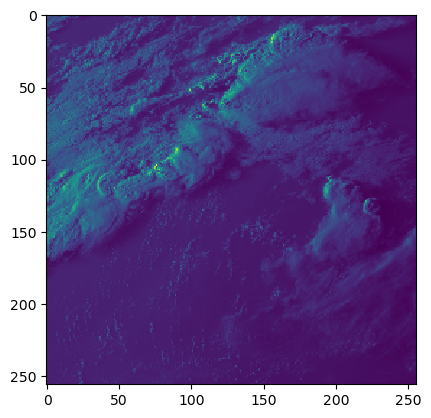

In [39]:
plt.imshow(patch['Rad'].values[0], interpolation='none')